# Retraitement des données 

In [9]:
%reset -f

In [10]:
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [11]:
N = len(pd.read_csv("../../data/case_1_spatial.csv"))
step_count = len(pd.read_csv("../../data/case_1_temporal.csv"))

print(N, step_count)

500 1511


In [12]:
e = np.empty(shape=(step_count, N), dtype=float)
f = np.empty(shape=(step_count, N), dtype=float)
t = np.empty(shape=(step_count, N), dtype=float)

for i in range(step_count):
# for i in range(1): 
    file_name = "../../data/anim/animation." + str(i) + ".csv";
    df = pd.read_csv(file_name)
    e[i] = np.array(df['E'])
    f[i] = np.array(df['F'])
    t[i] = np.array(df['T'])
    
x = np.array(df['x'])
rho = np.array(df['rho'])

# display(df)

In [13]:
%matplotlib nbagg

<IPython.core.display.Javascript object>


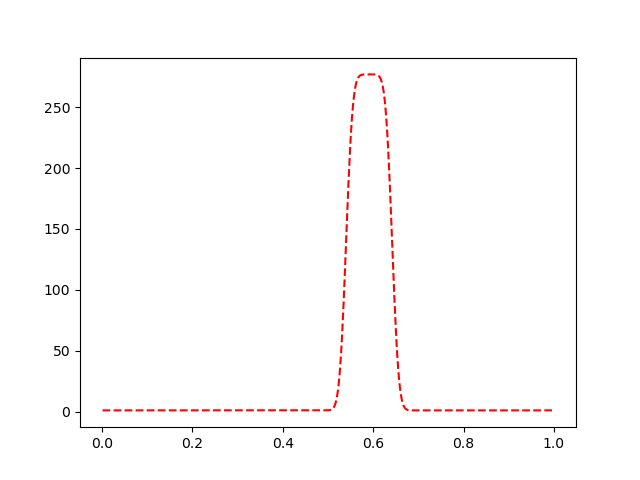

In [14]:
plt.plot(x, rho, 'r--')
plt.show()

<IPython.core.display.Javascript object>


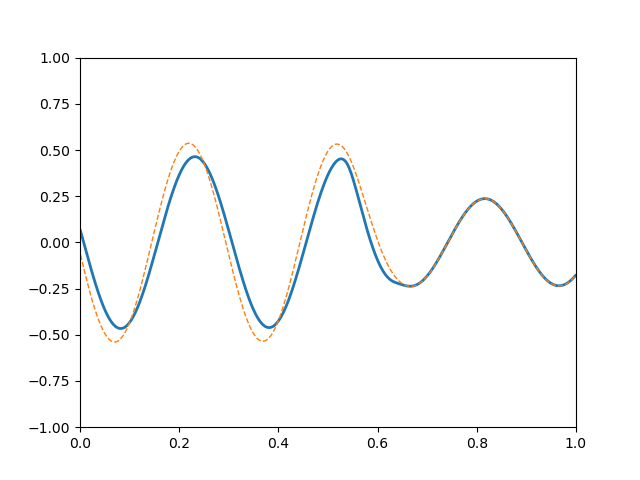

In [15]:
# initializing a figure in which the graph will be plotted 
fig = plt.figure()  
   
# marking the x-axis and y-axis 
axis = plt.axes(xlim =(0, 1), ylim =(-1, 1))  
  
# initializing a line variable 
line1, = axis.plot([], [], lw = 2)  
line2, = axis.plot([], [], '--', lw = 1)
line3, = axis.plot([], [], lw = 3)
   
# data which the line will contain (x, y) 
def init():  
    line1.set_data([], []) 
#     line2.set_data([], [])
    line2.set_data([], []) 
#     line3.set_data([], []) 
#     return line1, line2, line3
    return line1, line2
   
def animate(i): 
    line1.set_data(x, e[i])
#     line2.set_data(x, rho)
    line2.set_data(x, f[i]) 
#     line3.set_data(x, t[i]) 
#     return line1, line2, line3
    return line1, line2
   
anim = FuncAnimation(fig, animate, init_func = init, 
                     frames = step_count, interval = 10, repeat=False, blit = True) 

In [18]:
anim.save('energie_et_flux_3.mp4', writer = 'ffmpeg', fps = 50)